In [17]:
import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))

from preprocessing import preprocess_data
from logistic_regression import (
    train_logistic_regression,
    train_logistic_regression_reg,
    predict,
    accuracy,
    precision,
    recall,
    f1_score
)

In [18]:
import pandas as pd

df = pd.read_csv("../data/diabetes.csv")

X_train, X_test, y_train, y_test = preprocess_data(df)

w, b, losses = train_logistic_regression(X_train, y_train, lr=0.1, epochs=1000)

y_pred = predict(X_test, w, b)

print("Accuracy :", accuracy(y_test, y_pred))
print("Precision:", precision(y_test, y_pred))
print("Recall   :", recall(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

Accuracy : 0.7445887445887446
Precision: 0.671875
Recall   : 0.5308641975308642
F1-score : 0.593103448275862


In [19]:
for lam in [0.0, 0.01, 0.1, 1.0, 10.0]:
    w_r, b_r, losses_r = train_logistic_regression_reg(X_train, y_train, lr=0.1, epochs=1000, lam=lam)
    y_pred = predict(X_test, w_r, b_r)

    print("\nλ =", lam)
    print("Accuracy :", accuracy(y_test, y_pred))
    print("Precision:", precision(y_test, y_pred))
    print("Recall   :", recall(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))


λ = 0.0
Accuracy : 0.7445887445887446
Precision: 0.671875
Recall   : 0.5308641975308642
F1-score : 0.593103448275862

λ = 0.01
Accuracy : 0.7445887445887446
Precision: 0.671875
Recall   : 0.5308641975308642
F1-score : 0.593103448275862

λ = 0.1
Accuracy : 0.7445887445887446
Precision: 0.671875
Recall   : 0.5308641975308642
F1-score : 0.593103448275862

λ = 1.0
Accuracy : 0.7445887445887446
Precision: 0.671875
Recall   : 0.5308641975308642
F1-score : 0.593103448275862

λ = 10.0
Accuracy : 0.7359307359307359
Precision: 0.65625
Recall   : 0.5185185185185185
F1-score : 0.5793103448275861


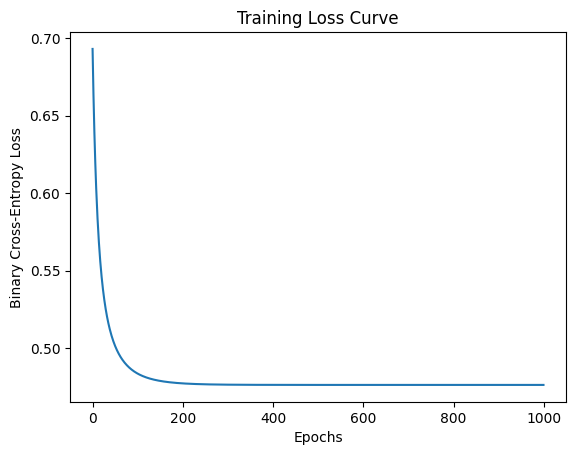

In [16]:
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

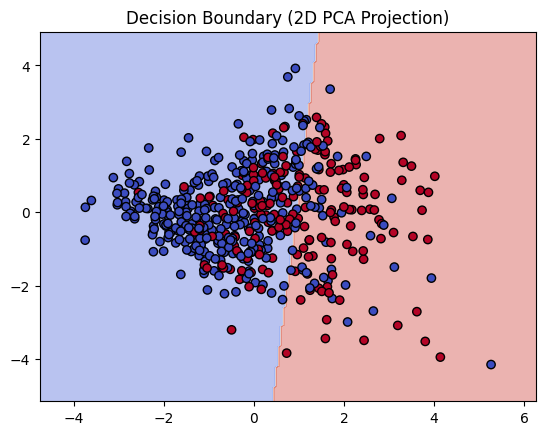

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

w2, b2, _ = train_logistic_regression(X_train_2d, y_train, lr=0.1, epochs=1000)

x_min, x_max = X_train_2d[:,0].min() - 1, X_train_2d[:,0].max() + 1
y_min, y_max = X_train_2d[:,1].min() - 1, X_train_2d[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
p = predict(grid, w2, b2)
Z = p.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.4)
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, cmap="coolwarm", edgecolors="k")
plt.title("Decision Boundary (2D PCA Projection)")
plt.show()